In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yasa
import pandas as pd
import mne
from mne.datasets.sleep_physionet.age import fetch_data
from mne.time_frequency import psd_welch

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

In [2]:
ALICE, BOB = 0, 7

[alice_files, bob_files] = fetch_data(subjects=[ALICE, BOB], recording=[1])
print(alice_files)

raw_train = mne.io.read_raw_edf(alice_files[0], stim_channel='Event marker',
                                misc=['Temp rectal'])
annot_train = mne.read_annotations(alice_files[1])

raw_train.set_annotations(annot_train, emit_warning=False)

Using default location ~/mne_data for PHYSIONET_SLEEP...
['/net/nfs/home/imamura22/mne_data/physionet-sleep-data/SC4001E0-PSG.edf', '/net/nfs/home/imamura22/mne_data/physionet-sleep-data/SC4001EC-Hypnogram.edf']
Extracting EDF parameters from /net/nfs/home/imamura22/mne_data/physionet-sleep-data/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<RawEDF | SC4001E0-PSG.edf, 7 x 7950000 (79500.0 s), ~12 kB, data not loaded>

In [4]:
annotation_desc_2_event_id = {'Sleep stage W': 1,
                              'Sleep stage 1': 2,
                              'Sleep stage 2': 3,
                              'Sleep stage 3': 4,
                              'Sleep stage 4': 4,
                              'Sleep stage R': 5}

# create a new event_id that unifies stages 3 and 4
event_id = {'Sleep stage W': 1,
            'Sleep stage 1': 2,
            'Sleep stage 2': 3,
            'Sleep stage 3/4': 4,
            'Sleep stage R': 5}

In [8]:
raw_train.set_annotations(annot_train, emit_warning=False)

events_train, _ = mne.events_from_annotations(
    raw_train, event_id=annotation_desc_2_event_id, chunk_duration=30.)


tmax = 30. - 1. / raw_train.info['sfreq']  # tmax in included

epochs_train = mne.Epochs(raw=raw_train, events=events_train,
                          event_id=event_id, tmin=0., tmax=tmax, baseline=None)

hypno = events_train[:,2]

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
2650 matching events found
No baseline correction applied
0 projection items activated


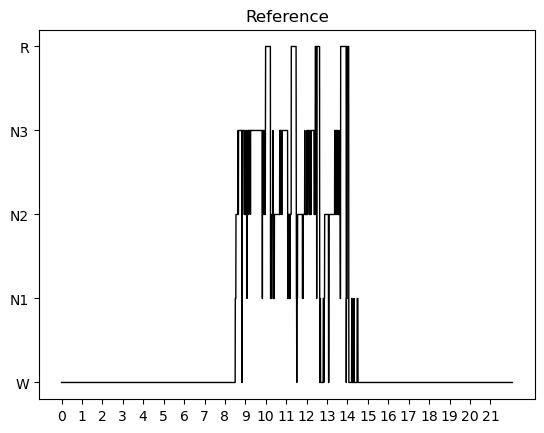

In [12]:
x = np.array(range(0, len(hypno)))
y = np.array(hypno)
plt.title("Reference")
plt.plot(x, y, color = "black", lw = 1)
plt.xticks([i * 120 for i in range(int(len(hypno)/120))], [i for i in range(int(len(hypno)/120))])
plt.yticks([1, 2, 3, 4, 5], ["W", "N1", "N2", "N3", "R"])
plt.show()